In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve

In [ ]:
"""
Regresja liniowa
(Metoda: uczenie nadzorowane, zasotosowanie: regresja) 
Laboratorium 6
"""

In [ ]:
"""
Problem 1.
Proszę o pobranie danych z ISLR dotyczących budżetów reklamowych. Zbiór danych zawiera informacje nt. konkretnych produktów (tysiące jednostek) jako funkcję budżetów reklamowych (w tysiącach dolarów) w telewizji, radio i gazetach. Jaki jest związek między każdym kanałem reklamowym a sprzedażą?
1. Przygotowanie danych.
2. Wizualizacja danych (wykres punktowy zależności sprzedaży dla każdego kanału dystrybucji, wykres porównawczy, itd.)
3. Przygotowanie zbioru danych do podziału na zbiór treningowy i testowy.
	Korzystając z modułu Scikit-Learn zaimportować funkcję rozdzielającą zbiór danych uczących na podzbiory trenujący i testowy train_test_split. X_train, X_test - atrybuty (cechy), y_train, y_test - etykiety (atrybuty warunkowe - decyzja). Zbiór testowy, będzie stanowił 30% całego zbioru danych. Zarodek liczb losowych = 101.
4. Budowa modelu regresji liniowej wielu zmiennych:
	a. Wytrenowanie modelu.
	b. Wypróbowanie modelu na zbiorze testowym.
	c. Ewaluacja modelu -> wyznaczenie wartości punktu przecięcia z osią y i współczynników kierunkowych dla każdej cechy - jak je interpretować?
	d. Ocena modelu -> metryki regersji.
	e. Reszta (residual).	
 """

In [4]:
df = pd.read_csv('./data/Advertising.csv', index_col=0)

In [5]:
df.shape

(200, 4)

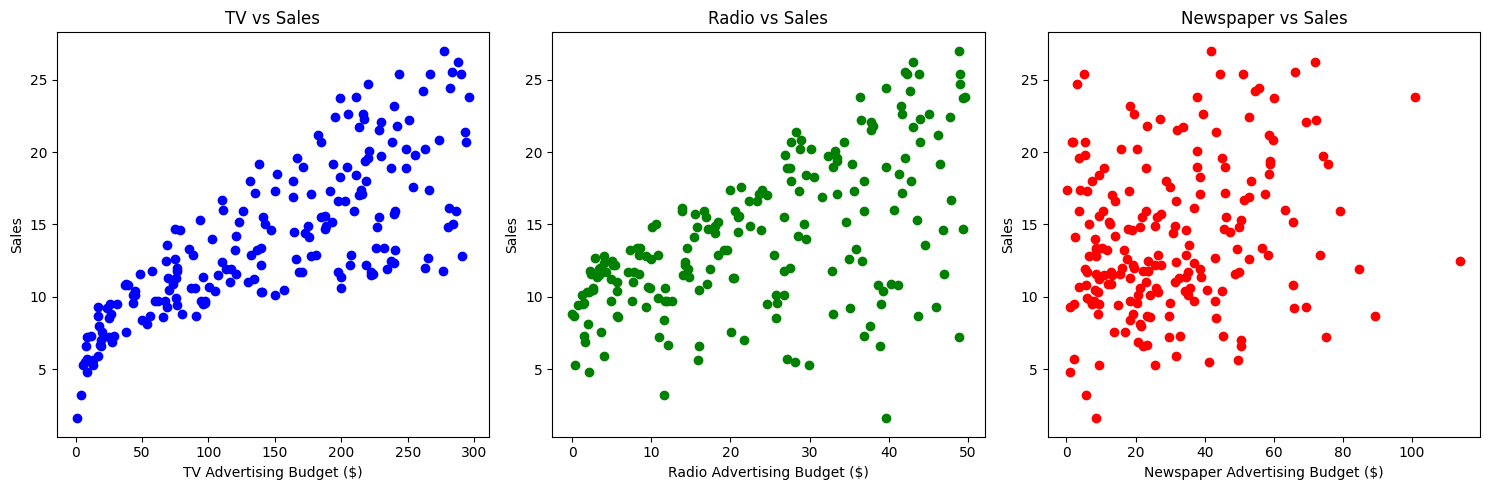

In [7]:
# Krok 2: Wizualizacja danych
# Wykres punktowy zależności sprzedaży dla każdego kanału dystrybucji
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.scatter(df['TV'], df['Sales'], color='blue')
plt.title('TV vs Sales')
plt.xlabel('TV Advertising Budget ($)')
plt.ylabel('Sales')

plt.subplot(132)
plt.scatter(df['Radio'], df['Sales'], color='green')
plt.title('Radio vs Sales')
plt.xlabel('Radio Advertising Budget ($)')
plt.ylabel('Sales')

plt.subplot(133)
plt.scatter(df['Newspaper'], df['Sales'], color='red')
plt.title('Newspaper vs Sales')
plt.xlabel('Newspaper Advertising Budget ($)')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()

In [9]:
# Krok 3: Przygotowanie zbioru danych do podziału na zbiór treningowy i testowy
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [17]:
# Krok 4: Budowa modelu regresji liniowej wielu zmiennych
# a. Wytrenowanie modelu
model = LinearRegression()
model.fit(X_train, y_train)

# b. Wypróbowanie modelu na zbiorze testowym
y_pred = model.predict(X_test)

# c. Ewaluacja modelu
intercept = model.intercept_
coefficients = model.coef_

print(f'Intercept: {intercept}')
print(f'Coefficients: TV={coefficients[0]}, Radio={coefficients[1]}, Newspaper={coefficients[2]}')

Intercept: 3.151526768070651
Coefficients: TV=0.044695993230766035, Radio=0.18756570186587007, Newspaper=-0.00032275300998735323


In [18]:
# d. Ocena modelu - metryki regresji
print('\nMetryki regresji:')
print(f'MAE (Mean Absolute Error): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'MSE (Mean Squared Error): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'RMSE (Root Mean Squared Error): {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'R^2 (Coefficient of Determination): {metrics.r2_score(y_test, y_pred)}')


Metryki regresji:
MAE (Mean Absolute Error): 1.213745773614481
MSE (Mean Squared Error): 2.2987166978863796
RMSE (Root Mean Squared Error): 1.5161519375993884
R^2 (Coefficient of Determination): 0.9185780903322445


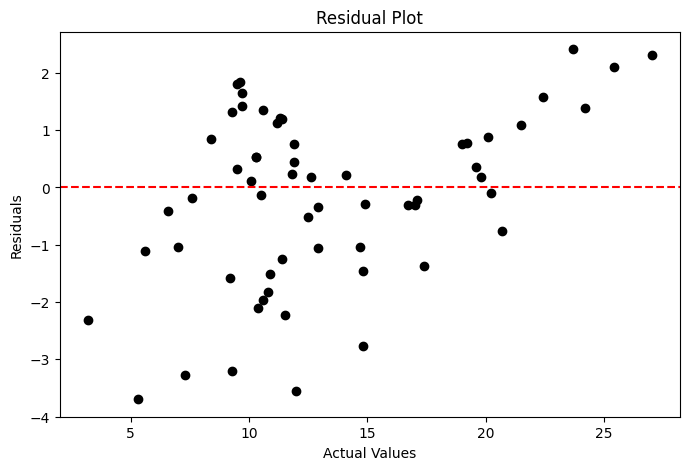

In [19]:
# e. Reszta (residual)
residuals = y_test - y_pred

# Wizualizacja reszt
plt.figure(figsize=(8, 5))
plt.scatter(y_test, residuals, color='black')
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

In [ ]:
"""Problem 1.

Proszę o pobranie danych ze źródła:
https://www.kaggle.com/c/titanic 
Zbiór danych dotyczący pasażerów statku rejsowego Titanic, zbiór będzie wykorzystany w celu predykcji czy dany pasażer przeżył katastrofę czy zmarł."""

In [20]:
titanic_df = pd.read_csv('./data/titanic.csv')

In [21]:
titanic_df.shape

(891, 12)

In [24]:
# Krok 2a: Sprawdzenie brakujących danych
missing_data = titanic_df.isnull().sum()
missing_data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

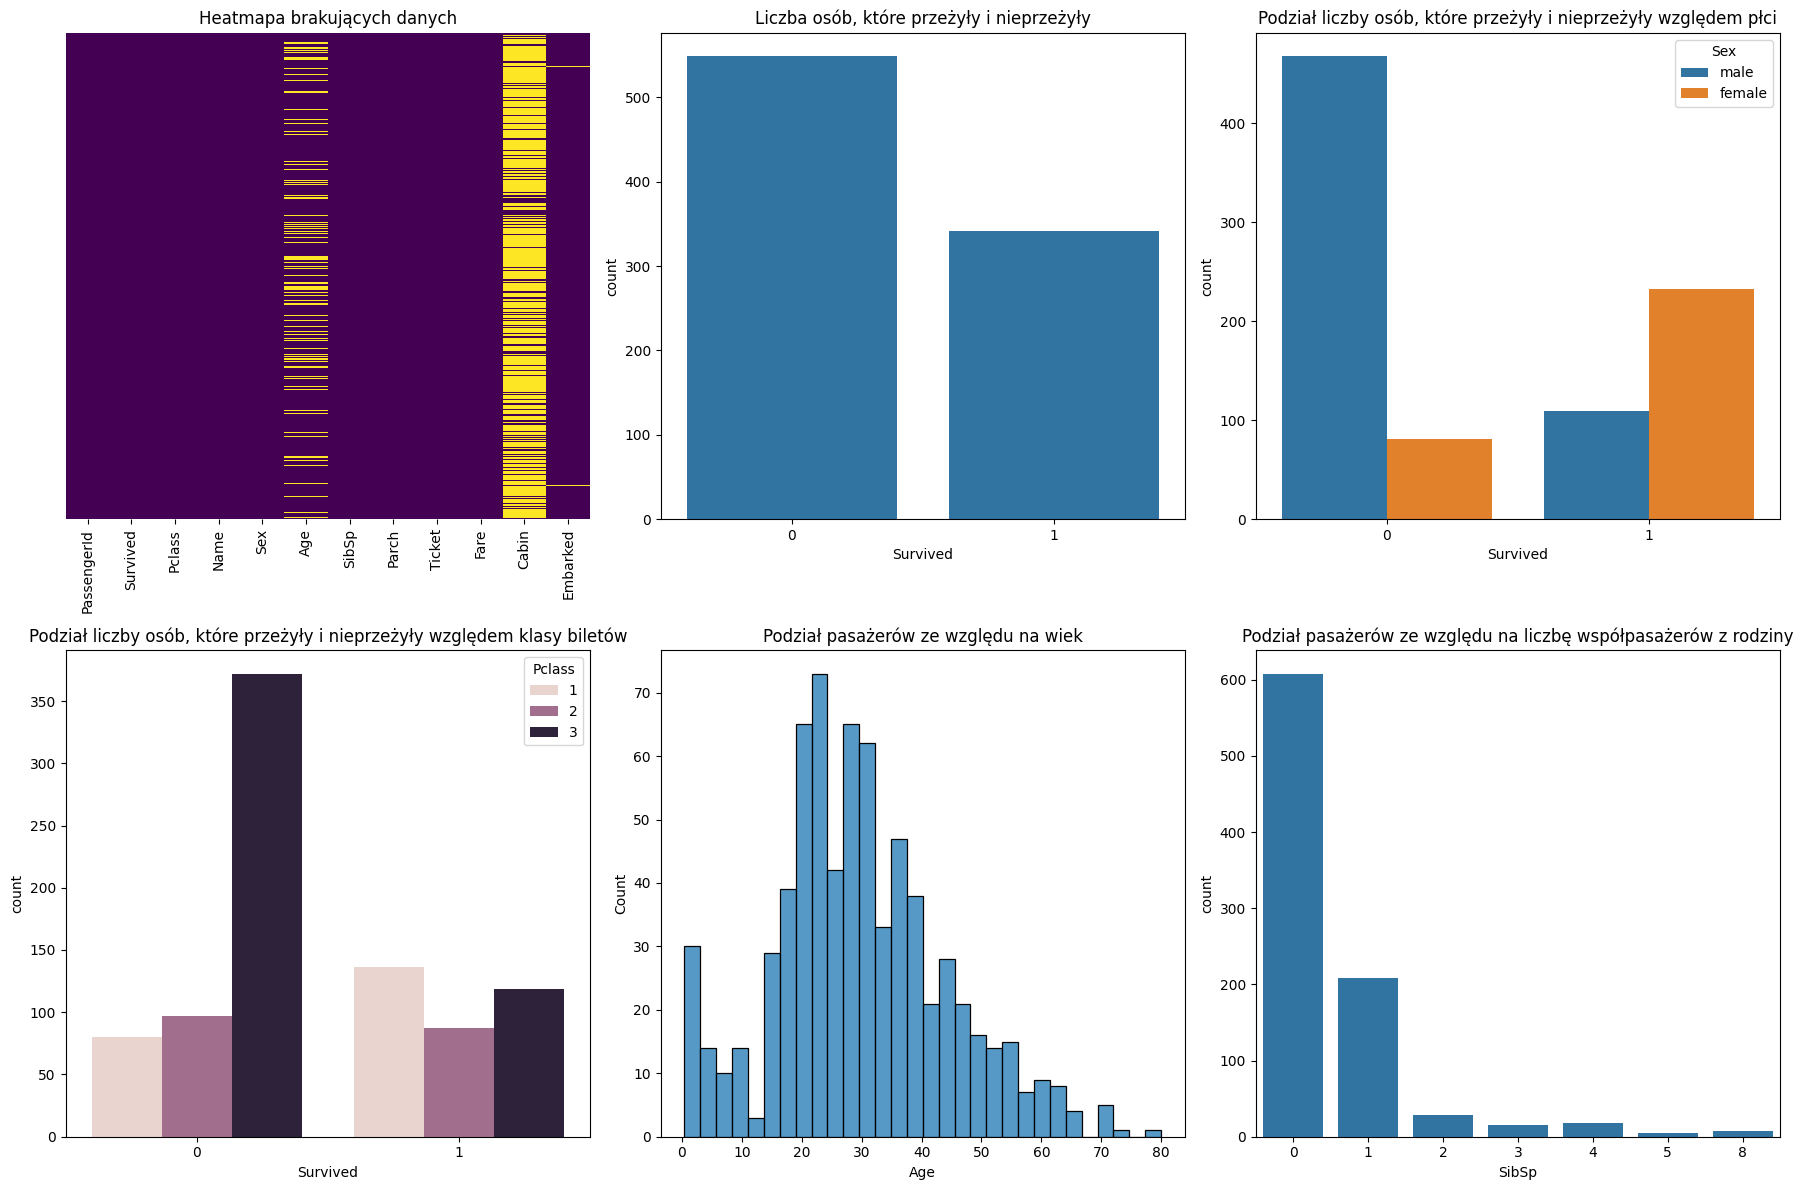

In [28]:
# Krok 2b: Wizualizacja
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

# Heatmapa brakujących danych
sns.heatmap(titanic_df.isnull(), cmap='viridis', cbar=False, yticklabels=False, ax=axes[0, 0])
axes[0, 0].set_title('Heatmapa brakujących danych')

# Liczba osób, które przeżyły i nieprzeżyły
sns.countplot(x='Survived', data=titanic_df, ax=axes[0, 1])
axes[0, 1].set_title('Liczba osób, które przeżyły i nieprzeżyły')

# Podział liczby osób, które przeżyły i nieprzeżyły względem płci
sns.countplot(x='Survived', hue='Sex', data=titanic_df, ax=axes[0, 2])
axes[0, 2].set_title('Podział liczby osób, które przeżyły i nieprzeżyły względem płci')

# Podział liczby osób, które przeżyły i nieprzeżyły względem klasy biletów
sns.countplot(x='Survived', hue='Pclass', data=titanic_df, ax=axes[1, 0])
axes[1, 0].set_title('Podział liczby osób, które przeżyły i nieprzeżyły względem klasy biletów')

# Podział pasażerów ze względu na wiek
sns.histplot(titanic_df['Age'].dropna(), kde=False, bins=30, ax=axes[1, 1])
axes[1, 1].set_title('Podział pasażerów ze względu na wiek')

# Podział pasażerów ze względu na liczbę współpasażerów z rodziny
sns.countplot(x='SibSp', data=titanic_df, ax=axes[1, 2])
axes[1, 2].set_title('Podział pasażerów ze względu na liczbę współpasażerów z rodziny')

plt.tight_layout()
plt.show()

In [30]:
# Krok 2c: Data Cleaning
# Imputacja wieku
titanic_df['Age'] = titanic_df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.mean()))
# Usunięcie kolumny 'Cabin'
titanic_df.drop('Cabin', axis=1, inplace=True)
# Usunięcie wierszy z brakującymi danymi w kolumnie 'Embarked'
titanic_df.dropna(subset=['Embarked'], inplace=True)

In [31]:
# Krok 2d: Przekształcenie danych kategorialnych
# Stworzenie zmiennej fikcyjnej dotyczącej płci
sex_dummies = pd.get_dummies(titanic_df['Sex'], drop_first=True, prefix='Sex')
# Stworzenie zmiennej fikcyjnej dotyczącej embark
embark_dummies = pd.get_dummies(titanic_df['Embarked'], drop_first=True, prefix='Embarked')
# Usunięcie kolumn 'Sex', 'Embarked', 'Name', 'Ticket' z danych treningowych
titanic_df.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
# Stworzenie tabeli z przetworzonych danych treningowych + zmienna dotycząca płci + zmienna dotycząca embark
titanic_df = pd.concat([titanic_df, sex_dummies, embark_dummies], axis=1)
# Usunięcie kolumny 'PassengerId'
titanic_df.drop('PassengerId', axis=1, inplace=True)

In [32]:
# Krok 3: Podział zbioru danych na treningowy i testowy
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [33]:
# Krok 4: Budowa modelu regresji logistycznej
# a. Wytrenowanie modelu
model = LogisticRegression()
model.fit(X_train, y_train)

# b. Wypróbowanie modelu na zbiorze testowym
y_pred = model.predict(X_test)

# c. Ewaluacja modelu
print('Raport z klasyfikacji:')
print(classification_report(y_test, y_pred))

Raport z klasyfikacji:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       163
           1       0.84      0.70      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



c:\ProgramData\anaconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


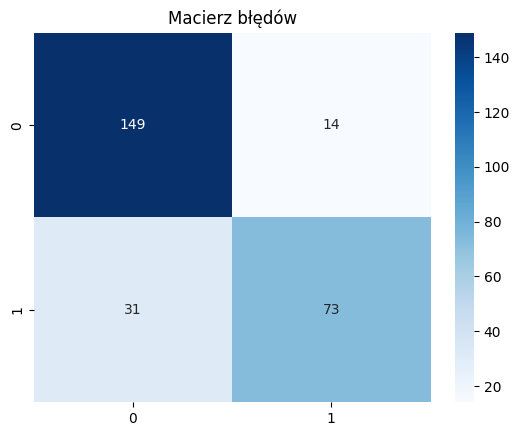

In [34]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Macierz błędów')
plt.show()

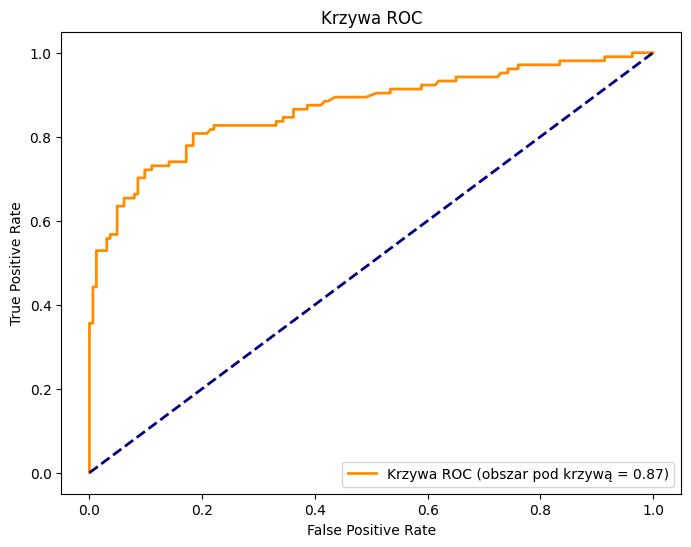

In [35]:
# d. Krzywa ROC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Krzywa ROC (obszar pod krzywą = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywa ROC')
plt.legend(loc="lower right")
plt.show()

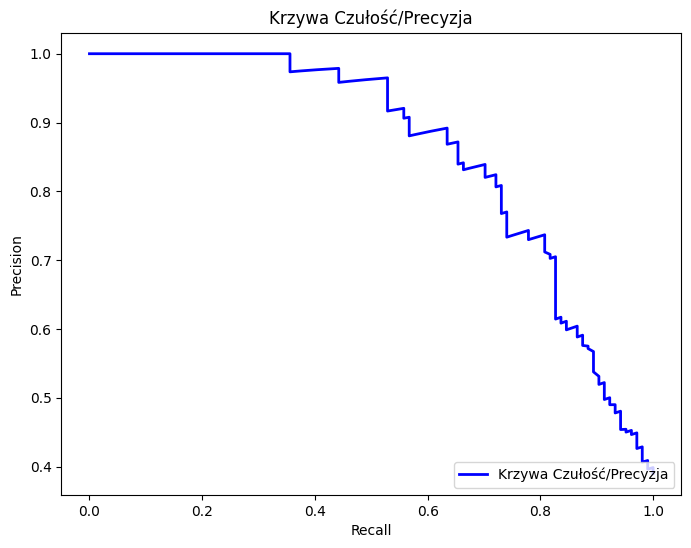

In [36]:
# e. Krzywa czułość/precyzja
precision, recall, thresholds = precision_recall_curve(y_test, model.predict_proba(X_test)[:,1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Krzywa Czułość/Precyzja')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Krzywa Czułość/Precyzja')
plt.legend(loc="lower right")
plt.show()

In [ ]:
"""
Problem 2.
Proszę o pobranie danych ze źródła:
https://archive.ics.uci.edu/dataset/53/iris

Zbiór danych dotyczy kilku rodzajów irysów. Każdy irys jest opisany za pomocą 4 cech (długość i szerokość kielicha, długość i szerokość płatka). Wykorzystując regresję logistyczną należy przeprowadzić klasyfikację wieloklasową.

1. Wczytanie danych.
2. Sprawdzenie kompletności danych.
3. Sprawdzenie statystyk podstawowych, informacji nt. danych.
4. Wykres punktowy zależności długości płatka w funkcji szerokości płatka, dane różnicowane za pomocą gatunku/rodzaju.
5. Wykres punktowy zależności długości kielicha w funkcji szerokości kielicha, dane różnicowane za pomocą gatunku/rodzaju.
6. Wykres porównawczgo składającego się z macierzy par wszystkich zmiennych, różnicowanych na podstawie kolumny 'species'.
7. Mapa (heatmapa) korelacji.
8. Podział zbioru na podzbiór treningowy i testowy: zbiór testowy stanowi 25% całego zbioru danych, random_state=101.
9. Skalowanie danych:
	!!! Podobnie jak w przypadku wszystkich estymatorów należy dostosować funkcje skalujące wyłącznie do danych uczących: nie używa się metody fit() lub fit_transform() do innych zbiorów danych. Dopiero po wyuczeniu klasy skalującej można użyć metody transform() do przekształcenia innego typu danych np. zbioru walidacyjnego, zbioru testowego.
10. Budowa modelu wieloklasowej regresji logistycznej:
	a. dostrojenie modelu za pomocą metody przeszukiwania siatki (obiekt GridSearchCV):
		- parametr param_grid -> zawiera 2 słowniki: param_grid={'C':C,'penalty':penalty}, gdzie: C = np.logspace(0, 4, 10), penalty = ['l1', 'l2'].
	b. Wytrenowanie modelu.
	c. Wypróbowanie modelu na zbiorze testowym.
	d. Ewaluacja modelu na podstawie raportu z klasyfikacji i macierzy błędów (import raportu i macierzy błędów z modułu sklearn.metrics).	
	e. Krzywa ROC korzystając z funkcji roc_curve.
	f. Krzywa czułość/precyzja.
 """

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.multiclass import OneVsRestClassifier

In [38]:
# Krok 1: Wczytanie danych
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris_data = pd.read_csv(url, header=None, names=column_names)

In [41]:
# Krok 2: Sprawdzenie kompletności danych
iris_data.isnull().sum()
#no missing data

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [40]:
# Krok 3: Statystyki podstawowe i informacje nt. danych
basic_stats = iris_data.describe()
data_info = iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


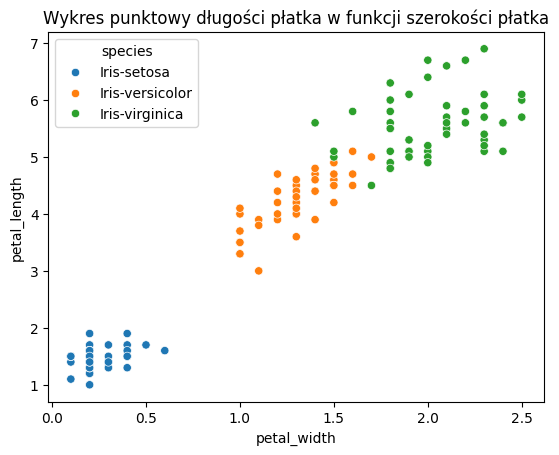

In [42]:
# Krok 4: Wykres punktowy długości płatka w funkcji szerokości płatka, dane różnicowane za pomocą gatunku/rodzaju
sns.scatterplot(x='petal_width', y='petal_length', hue='species', data=iris_data)
plt.title('Wykres punktowy długości płatka w funkcji szerokości płatka')
plt.show()

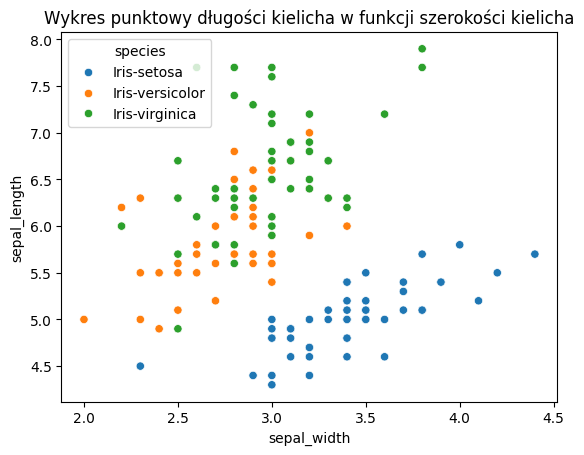

In [43]:
# Krok 5: Wykres punktowy długości kielicha w funkcji szerokości kielicha, dane różnicowane za pomocą gatunku/rodzaju
sns.scatterplot(x='sepal_width', y='sepal_length', hue='species', data=iris_data)
plt.title('Wykres punktowy długości kielicha w funkcji szerokości kielicha')
plt.show()

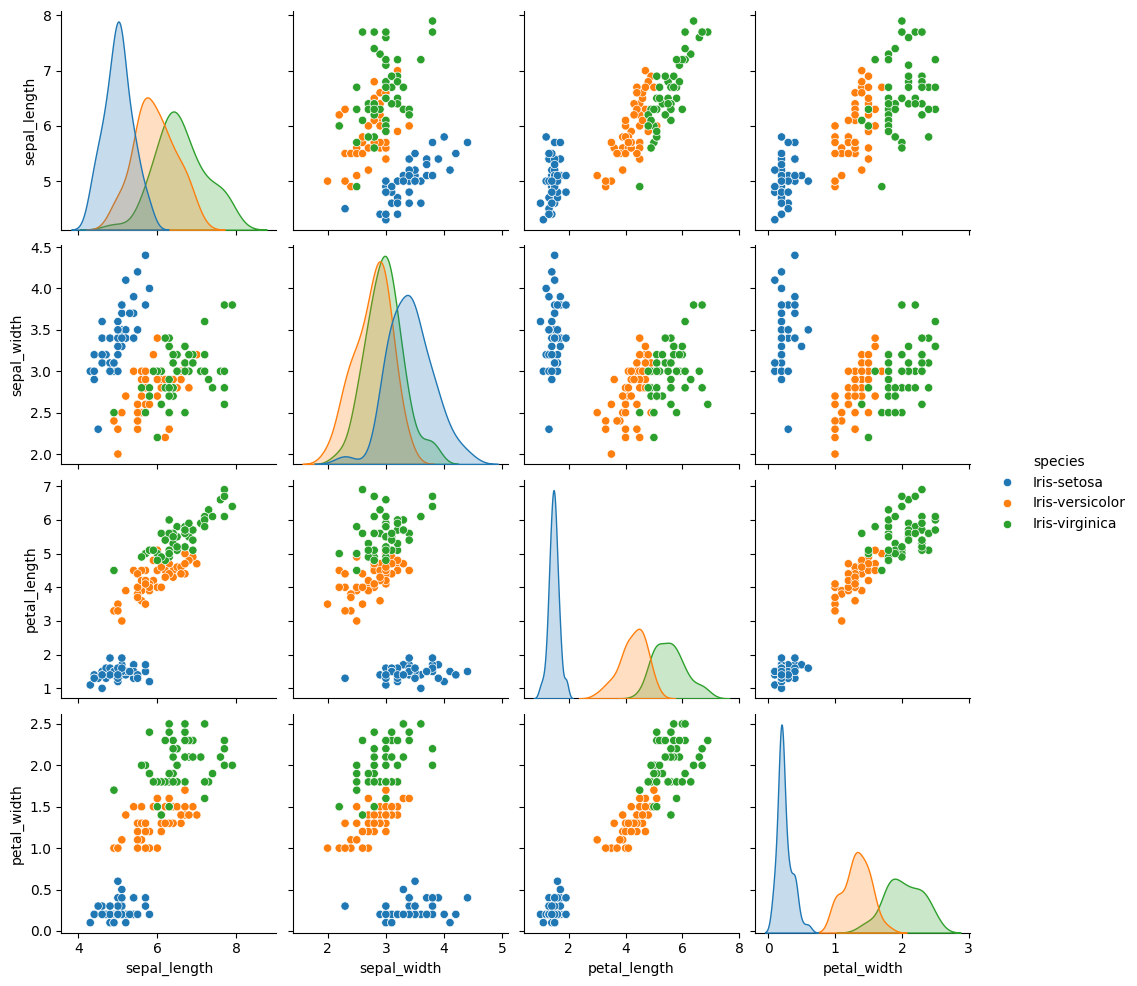

In [45]:
# Krok 6: Wykres porównawczy składający się z macierzy par wszystkich zmiennych
sns.pairplot(iris_data, hue='species')
#plt.title('Wykres porównawczy składający się z macierzy par wszystkich zmiennych')
plt.show()

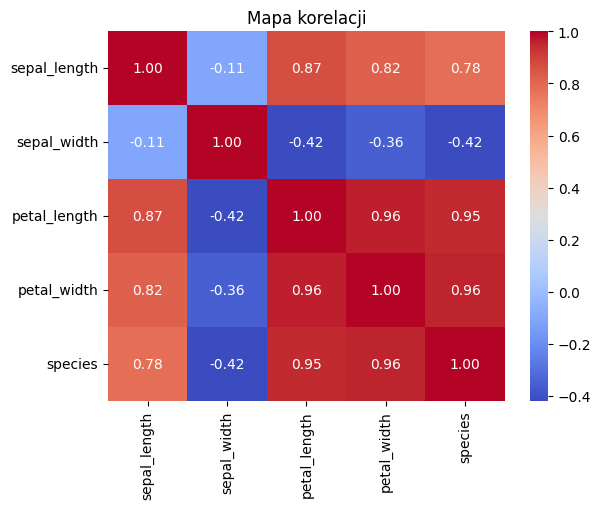

In [55]:
# Krok 7: Mapa (heatmapa) korelacji
# Przekształcenie etykiet kategorii na wartości liczbowe
label_encoder = LabelEncoder()
iris_data['species'] = label_encoder.fit_transform(iris_data['species'])

correlation_matrix = iris_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa korelacji')
plt.show()

In [47]:
# Krok 8: Podział zbioru na podzbiór treningowy i testowy
X = iris_data.drop('species', axis=1)
y = iris_data['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [48]:
# Krok 9: Skalowanie danych
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
# Krok 10: Budowa modelu wieloklasowej regresji logistycznej
# a. Dostrojenie modelu za pomocą metody przeszukiwania siatki (GridSearchCV)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(LogisticRegression(multi_class='ovr', solver='liblinear'), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(multi_class='ovr',
                                          solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

Raport z klasyfikacji:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.94      1.00      0.97        17
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



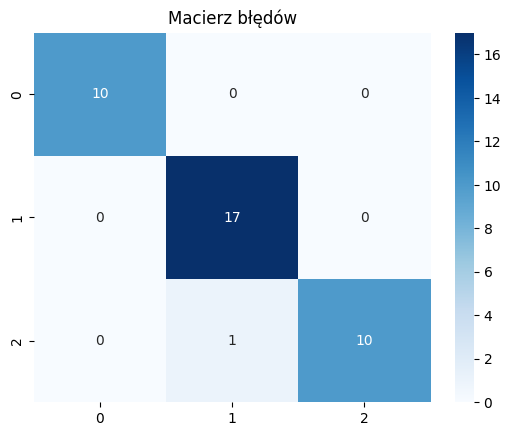

In [50]:
# Najlepsze parametry znalezione przez GridSearchCV
best_params = grid_search.best_params_

# b. Wytrenowanie modelu
model = LogisticRegression(multi_class='ovr', solver='liblinear', **best_params)
model.fit(X_train_scaled, y_train)

# c. Wypróbowanie modelu na zbiorze testowym
y_pred = model.predict(X_test_scaled)

# d. Ewaluacja modelu
print('Raport z klasyfikacji:')
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Macierz błędów')
plt.show()

c:\ProgramData\anaconda3\envs\myenv\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\envs\myenv\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\envs\myenv\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


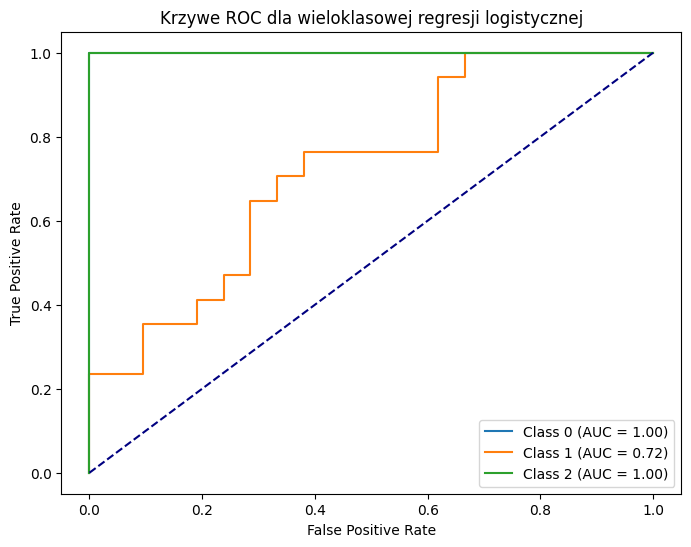

In [67]:
# Krok 10e: Krzywa ROC dla każdej klasy
plt.figure(figsize=(8, 6))
for i in range(3):
    # Przekształcenie etykiet kategorii na binarną reprezentację 0/1 dla każdej klasy
    y_bin_class = label_binarize(iris_data['species'], classes=[i])
    
    # Podział danych na zbiór treningowy i testowy
    X_train, X_test, y_train, y_test = train_test_split(iris_data.drop('species', axis=1), y_bin_class, test_size=0.25, random_state=101)

    # Budowa modelu wieloklasowej regresji logistycznej
    model = LogisticRegression()
    model.fit(X_train_scaled, y_train)

    # Ewaluacja modelu
    y_score = model.decision_function(X_test_scaled)

    # Krzywa ROC dla każdej klasy
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywe ROC dla wieloklasowej regresji logistycznej')
plt.legend()
plt.show()

c:\ProgramData\anaconda3\envs\myenv\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\envs\myenv\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\envs\myenv\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


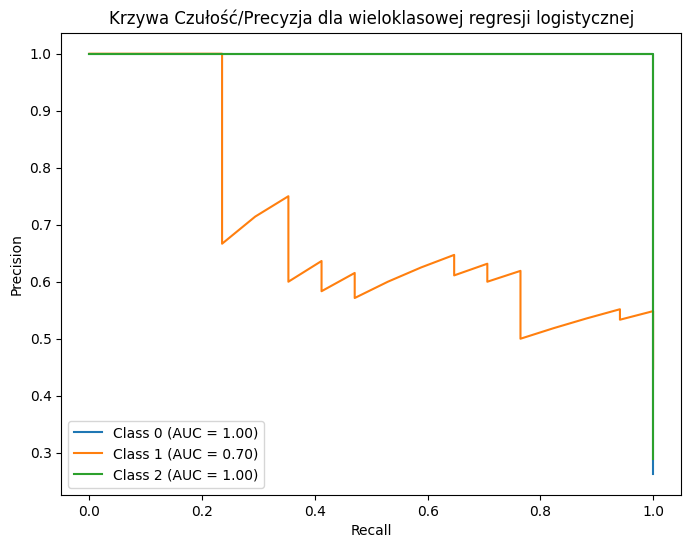

In [68]:
#do poprawy

plt.figure(figsize=(8, 6))
for i in range(3):
    # Przekształcenie etykiet kategorii na binarną reprezentację 0/1 dla każdej klasy
    y_bin_class = label_binarize(iris_data['species'], classes=[i])
    
    # Podział danych na zbiór treningowy i testowy
    X_train, X_test, y_train, y_test = train_test_split(iris_data.drop('species', axis=1), y_bin_class, test_size=0.25, random_state=101)

    # Budowa modelu wieloklasowej regresji logistycznej
    model = LogisticRegression()
    model.fit(X_train_scaled, y_train)

    # Ewaluacja modelu
    y_score = model.decision_function(X_test_scaled)

    # Krzywa czułość/precyzja dla każdej klasy
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'Class {i} (AUC = {pr_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Krzywa Czułość/Precyzja dla wieloklasowej regresji logistycznej')
plt.legend()
plt.show()